<a href="https://colab.research.google.com/github/Flezra/UAS-AI/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATASET CYBERBULLYING INSTAGRAM.xlsx to DATASET CYBERBULLYING INSTAGRAM.xlsx


In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
np.random.seed(123)

In [ ]:
data_sentimen= pd.read_excel("DATASET CYBERBULLYING INSTAGRAM.xlsx")
data_sentimen

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


from matplotlib import pyplot as plt
data_sentimen['No.'].plot(kind='hist', bins=20, title='No.')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data_sentimen.groupby('Kategori').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['No.']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'No.'}, axis=1)
              .sort_values('No.', ascending=True))
  xs = counted['No.']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_sentimen.sort_values('No.', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Kategori')):
  _plot_series(series, series_name, i)
  fig.legend(title='Kategori', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('No.')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data_sentimen['No.'].plot(kind='line', figsize=(8, 4), title='No.')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_sentimen['Kategori'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_sentimen, x='No.', y='Kategori', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Preprocessing Data**

In [ ]:
def remove_punctuation_and_number(text):
    '''a function for removing punctuation'''
    import string
    import re
    for sp in string.punctuation:
        text = text.replace(sp, " ")
    text = re.sub(r"\d+","",text)
    return text.replace('/\s\s+/g', ' ')
data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(remove_punctuation_and_number)

In [ ]:
sw = ["bacod","cokk","anjirrr","anjeng","anjir","anying","anjay","kolot","tolol"]
def stopwords(text):
    '''a function for removing the stopword'''
    import re
    text = [word.lower() for word in text.split()]
    for word in text:
        for stop in sw:
            if word==stop:
                text.remove(word)
    text = " ".join(text)
    text = re.sub(r'(.+?)\1+', r'\1',text)
    return text
data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(stopwords)
data_sentimen['Komentar']

0                    ka tidur ya udah pagi gaboleh capek
1                   makan nasi padang aja begini badanya
2      yang aku suka dari dia adalah selalu cukur jem...
3      hai kak isyana aku ngefans banget sama kak isy...
4      manusia apa bidari sih heran deh cantik terus 😌♥️
                             ...                        
645    aku memutuskan untuk menjadi fans isyana gila ...
646    amzing isyana jur aku amazed banget dengan ski...
647    paling ngiri liat orang keren maen alat musik ...
648    sampe ga bisa berkata lagi buat isyana sangat ...
649    inimah bukan main alat musik lagi olahraga jar...
Name: Komentar, Length: 650, dtype: object

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
data= stop_factory.get_stop_words()
stopword = stop_factory.create_stop_word_remover()
data_sentimen['Komentar']

0                    ka tidur ya udah pagi gaboleh capek
1                   makan nasi padang aja begini badanya
2      yang aku suka dari dia adalah selalu cukur jem...
3      hai kak isyana aku ngefans banget sama kak isy...
4      manusia apa bidari sih heran deh cantik terus 😌♥️
                             ...                        
645    aku memutuskan untuk menjadi fans isyana gila ...
646    amzing isyana jur aku amazed banget dengan ski...
647    paling ngiri liat orang keren maen alat musik ...
648    sampe ga bisa berkata lagi buat isyana sangat ...
649    inimah bukan main alat musik lagi olahraga jar...
Name: Komentar, Length: 650, dtype: object

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
data_sentimen['Komentar'] = data_sentimen['Komentar'].apply(stemming)
data_sentimen['Komentar']

0                    ka tidur ya udah pagi gaboleh capek
1                      makan nasi padang aja begini bada
2      yang aku suka dari dia adalah selalu cukur jem...
3      hai kak isyana aku ngefans banget sama kak isy...
4         manusia apa bidari sih heran deh cantik terus 
                             ...                        
645    aku putus untuk jadi fans isyana gila keren ba...
646    amzing isyana jur aku amazed banget dengan ski...
647    paling ngiri liat orang keren maen alat musik ...
648    sampe ga bisa kata lagi buat isyana sangat sem...
649    inimah bukan main alat musik lagi olahraga jar...
Name: Komentar, Length: 650, dtype: object

Counter({'Non-bullying': 325, 'Bullying': 325})


<Axes: xlabel='Kategori', ylabel='count'>

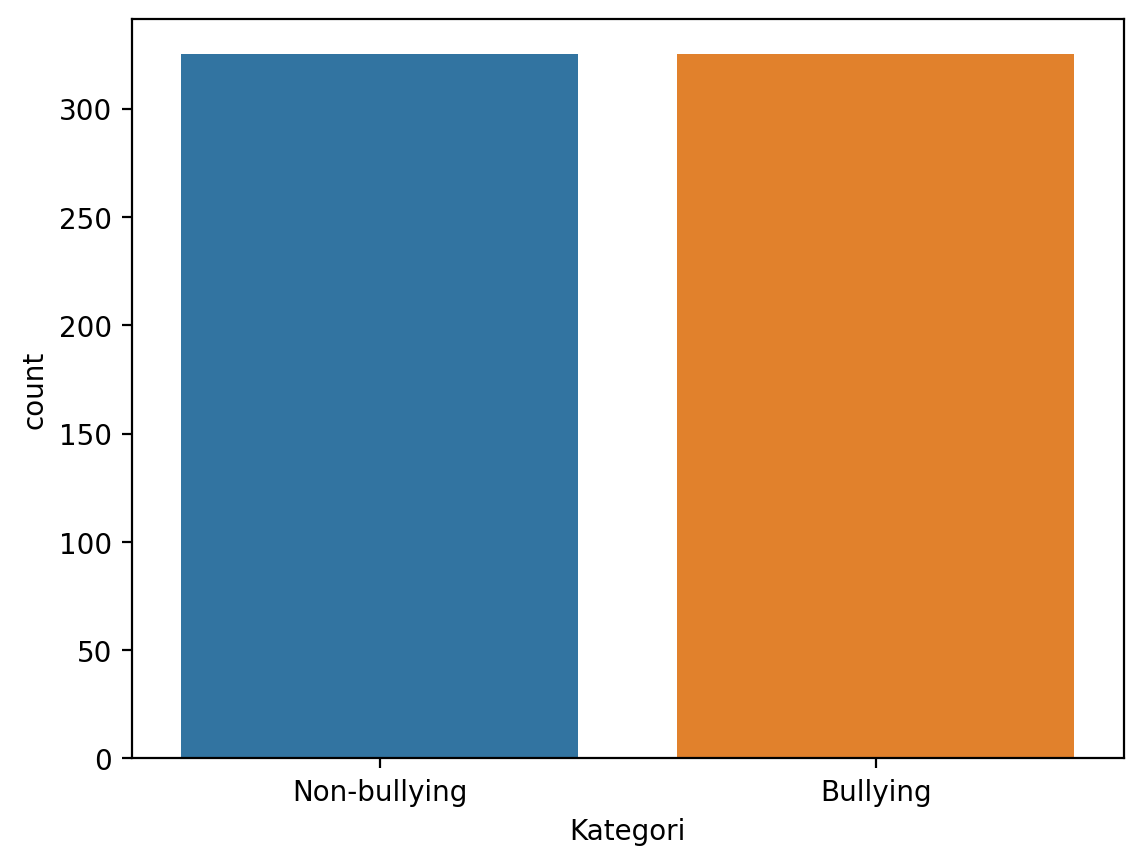

In [ ]:
x = data_sentimen.Komentar
y = data_sentimen.Kategori

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
Bullying= " ".join(review for review in data_sentimen[data_sentimen['Kategori'] == 'Bullying'].Komentar)
Non_Bullying= " ".join(review for review in data_sentimen[data_sentimen['Kategori'] == 'Non-bullying'].Komentar)
stopwords = set(STOPWORDS)
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off");

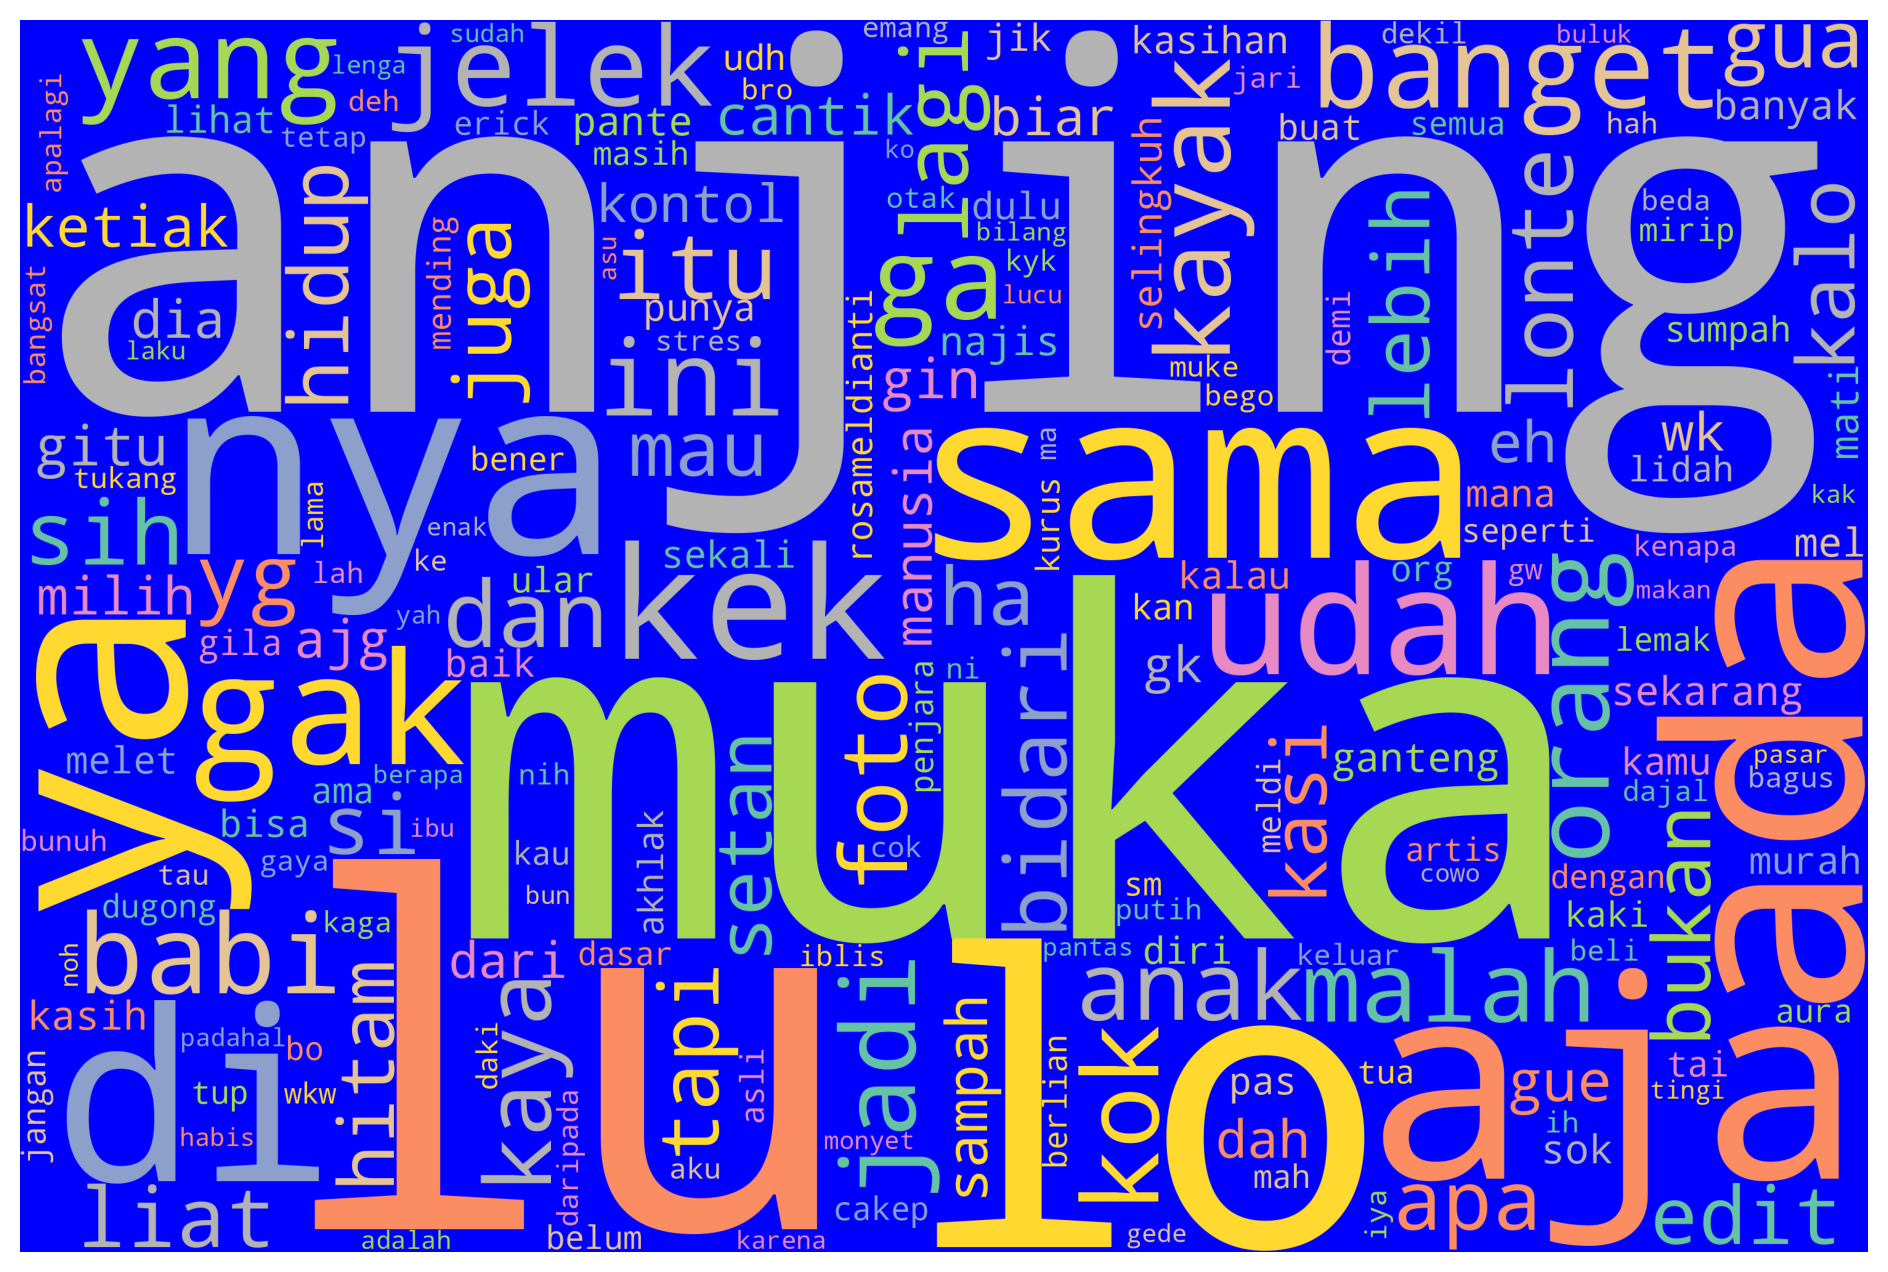

In [ ]:
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='blue', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(Bullying)
plot_cloud(wordcloud1)

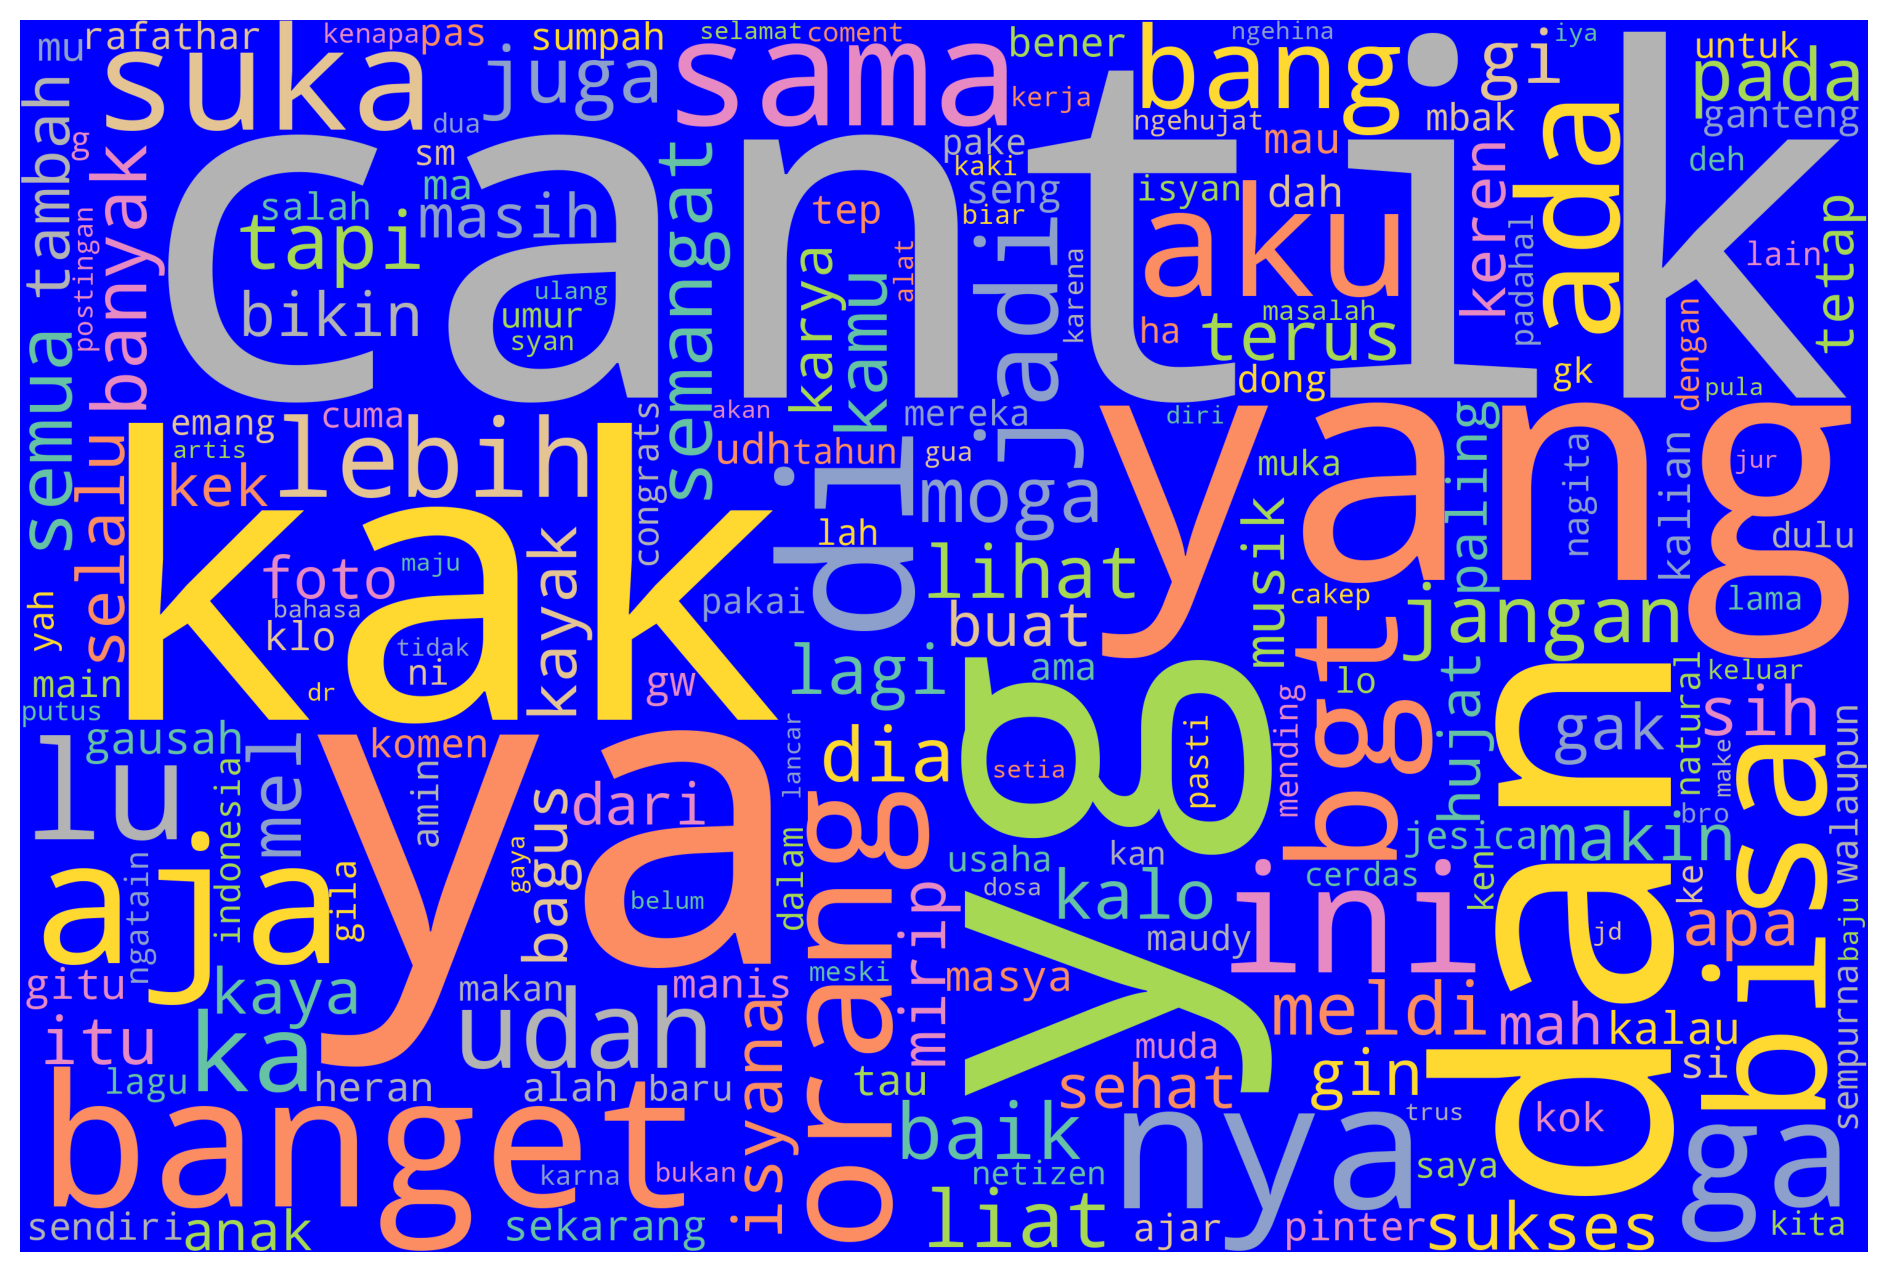

In [ ]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='blue', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(Non_Bullying)
plot_cloud(wordcloud2)

# replace label pada dataset
data_sentimen.Kategori.replace("Bullying", 0 , inplace = True)
data_sentimen.Kategori.replace("Non-bullying", 1 , inplace = True)
data_sentimen.head(10)

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_sentimen['Komentar'],data_sentimen['Kategori'],test_size=0.3)

In [ ]:
Count_vect = CountVectorizer(max_features=5000)
Count_vect.fit(data_sentimen['Komentar'])
Train_X_Count = Count_vect.transform(Train_X)
Test_X_Count = Count_vect.transform(Test_X)

###Klasifikasi menggunakan Naive Bayes

In [ ]:
# Naive Bayes Train_X, Test_X, Train_Y, Test_Y
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Count)
predictions_NB_t = Naive.predict(Train_X_Count)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score Training-> ",accuracy_score(predictions_NB_t, Train_Y)*100)
print("Naive Bayes Accuracy Score Testing-> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score Training->  98.24175824175823
Naive Bayes Accuracy Score Testing->  81.53846153846153


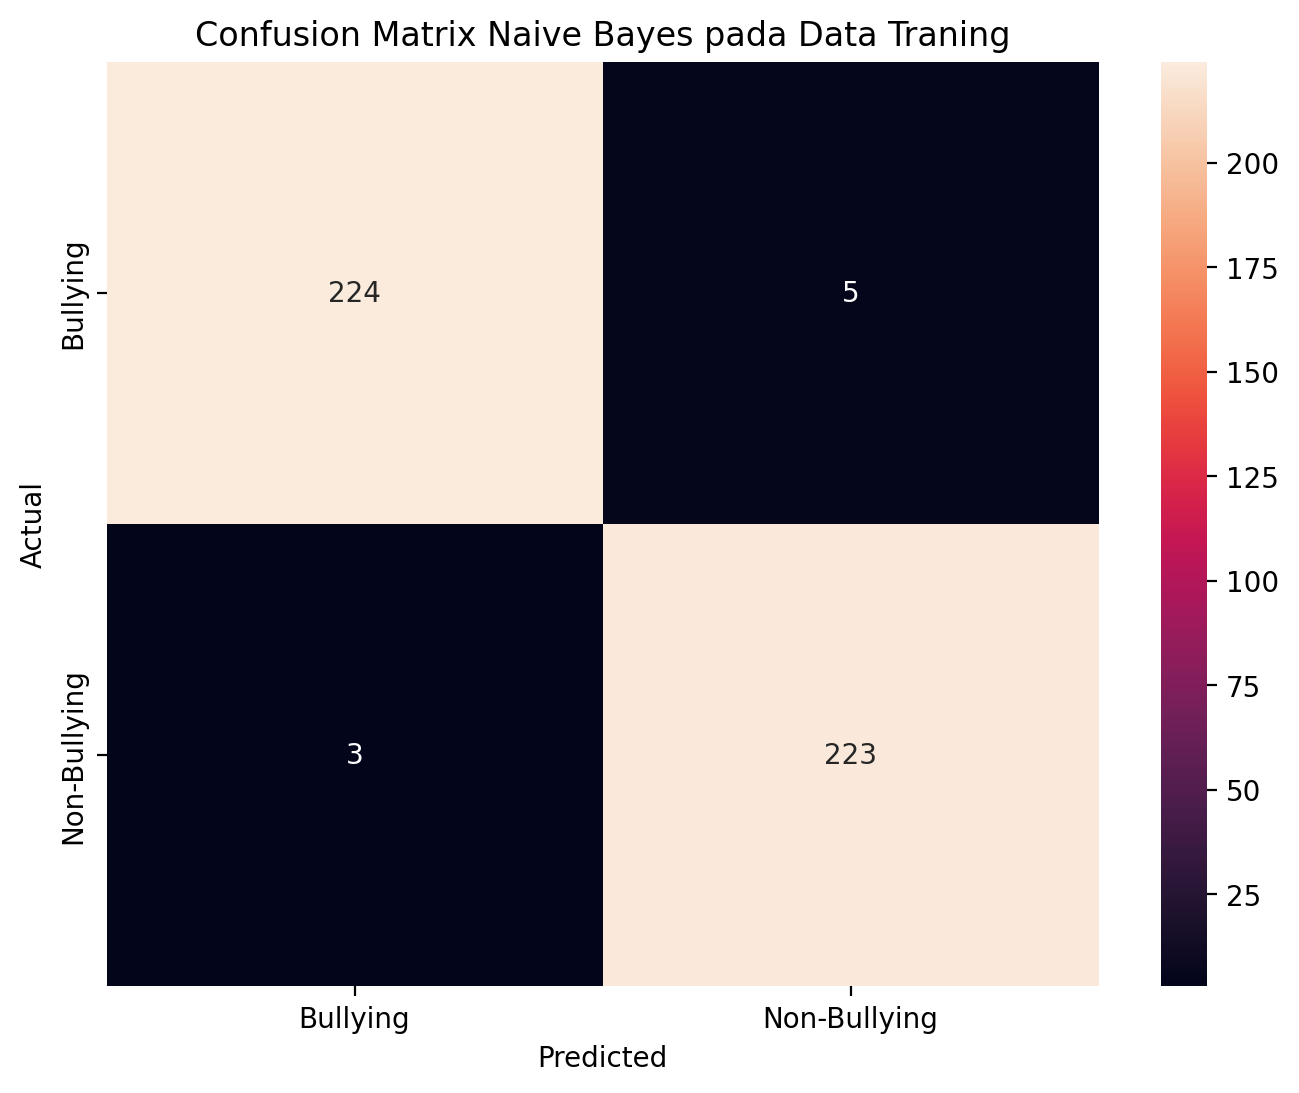

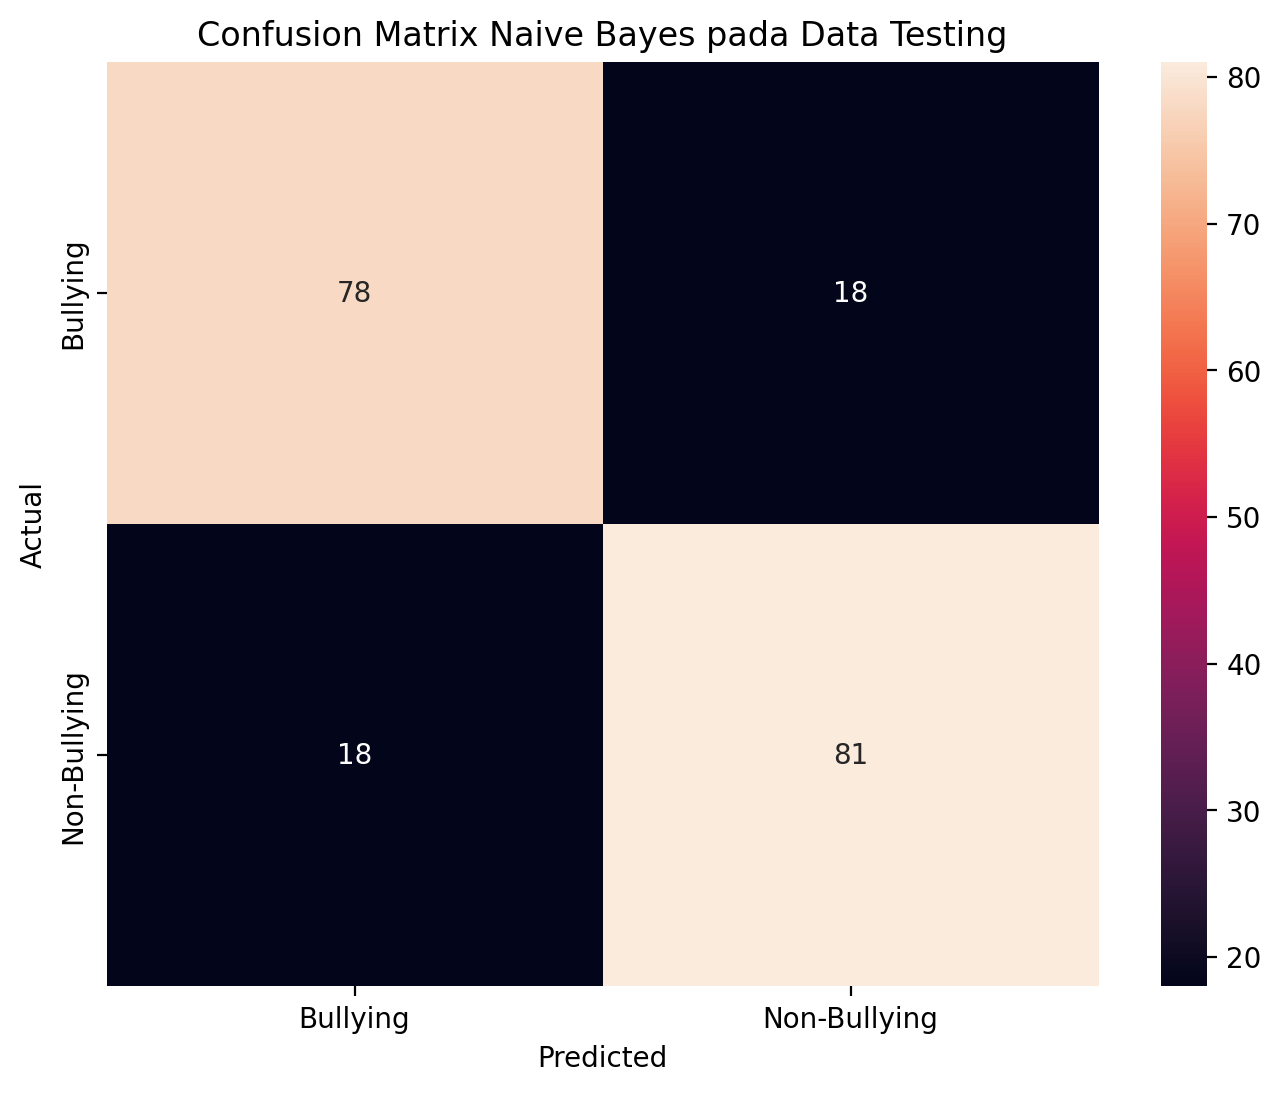

In [ ]:
# Confusion matrix Naive Bayes pada data train
conf_matNB_t = confusion_matrix(Train_Y, predictions_NB_t)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matNB_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix Naive Bayes pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matNB = confusion_matrix(Test_Y, predictions_NB)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matNB, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix Naive Bayes pada Data Testing')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report Naive Bayes pada data training
print("klasifikasi report Naive Bayes pada data training")
print(" ")
print(classification_report(Train_Y, predictions_NB_t))

print(" ")
print(" ")

#klasifikasi report Naive Bayes pada data testing
print("klasifikasi report Naive Bayes pada data testing")
print(" ")
print(classification_report(Test_Y, predictions_NB))

klasifikasi report Naive Bayes pada data training
 
              precision    recall  f1-score   support

    Bullying       0.99      0.98      0.98       229
Non-bullying       0.98      0.99      0.98       226

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

 
 
klasifikasi report Naive Bayes pada data testing
 
              precision    recall  f1-score   support

    Bullying       0.81      0.81      0.81        96
Non-bullying       0.82      0.82      0.82        99

    accuracy                           0.82       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195



###Klasifikasi menggunakan Support Vector Machine

In [ ]:
#SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Count)
predictions_SVM_t = SVM.predict(Train_X_Count)
#Nilai akurasi
print("SVM Accuracy Score Training-> ",accuracy_score(predictions_SVM_t, Train_Y)*100)
print("SVM Accuracy Score Testing-> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score Training->  100.0
SVM Accuracy Score Testing->  78.46153846153847


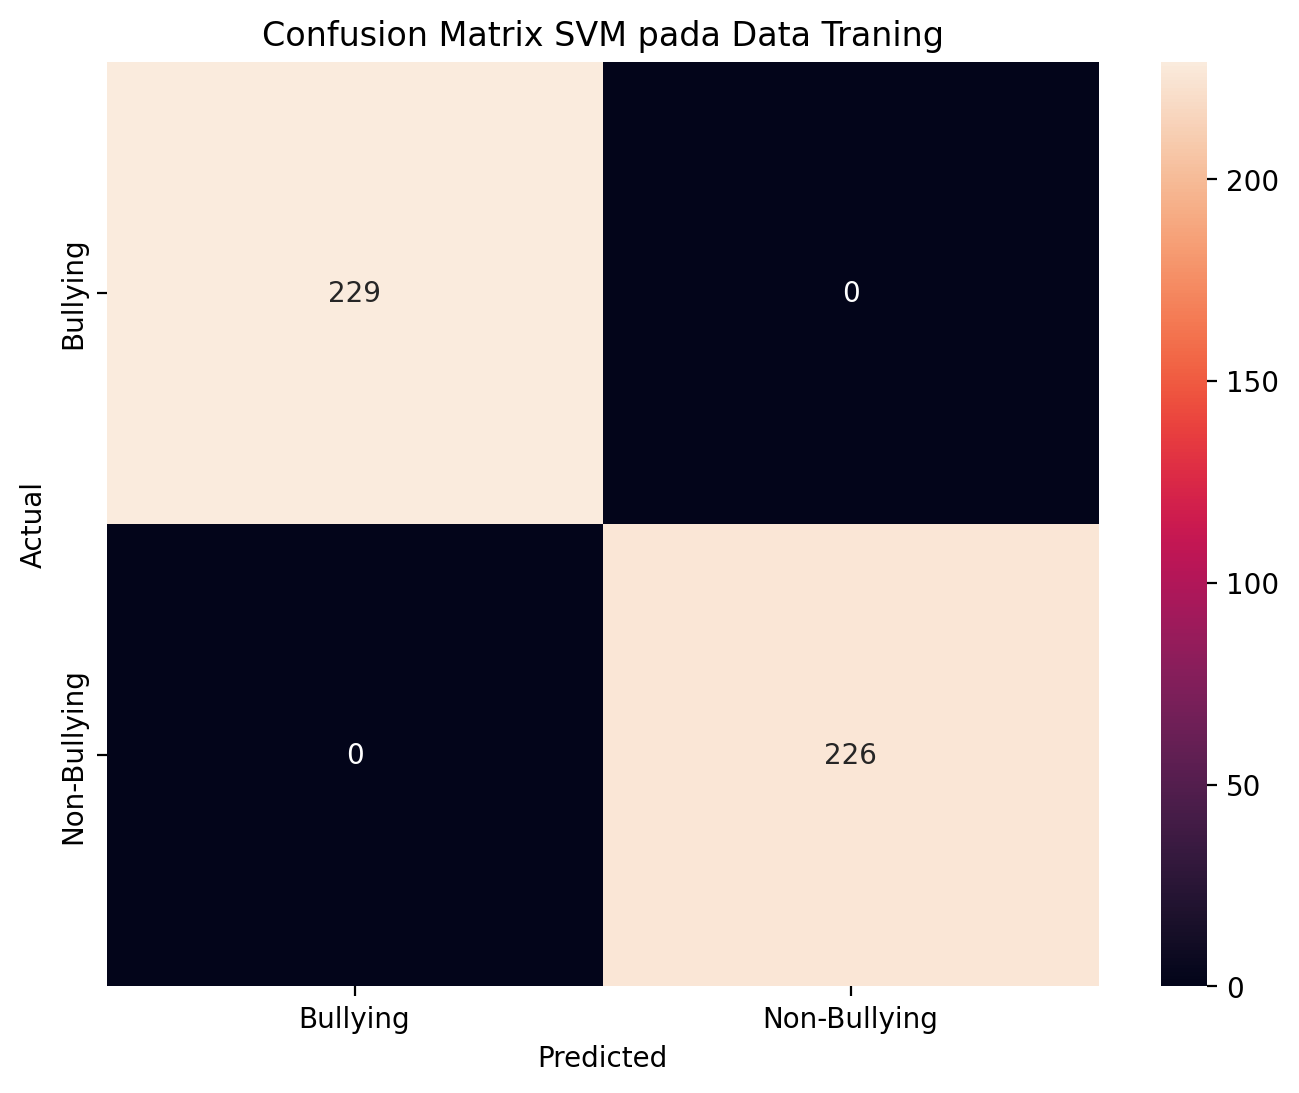

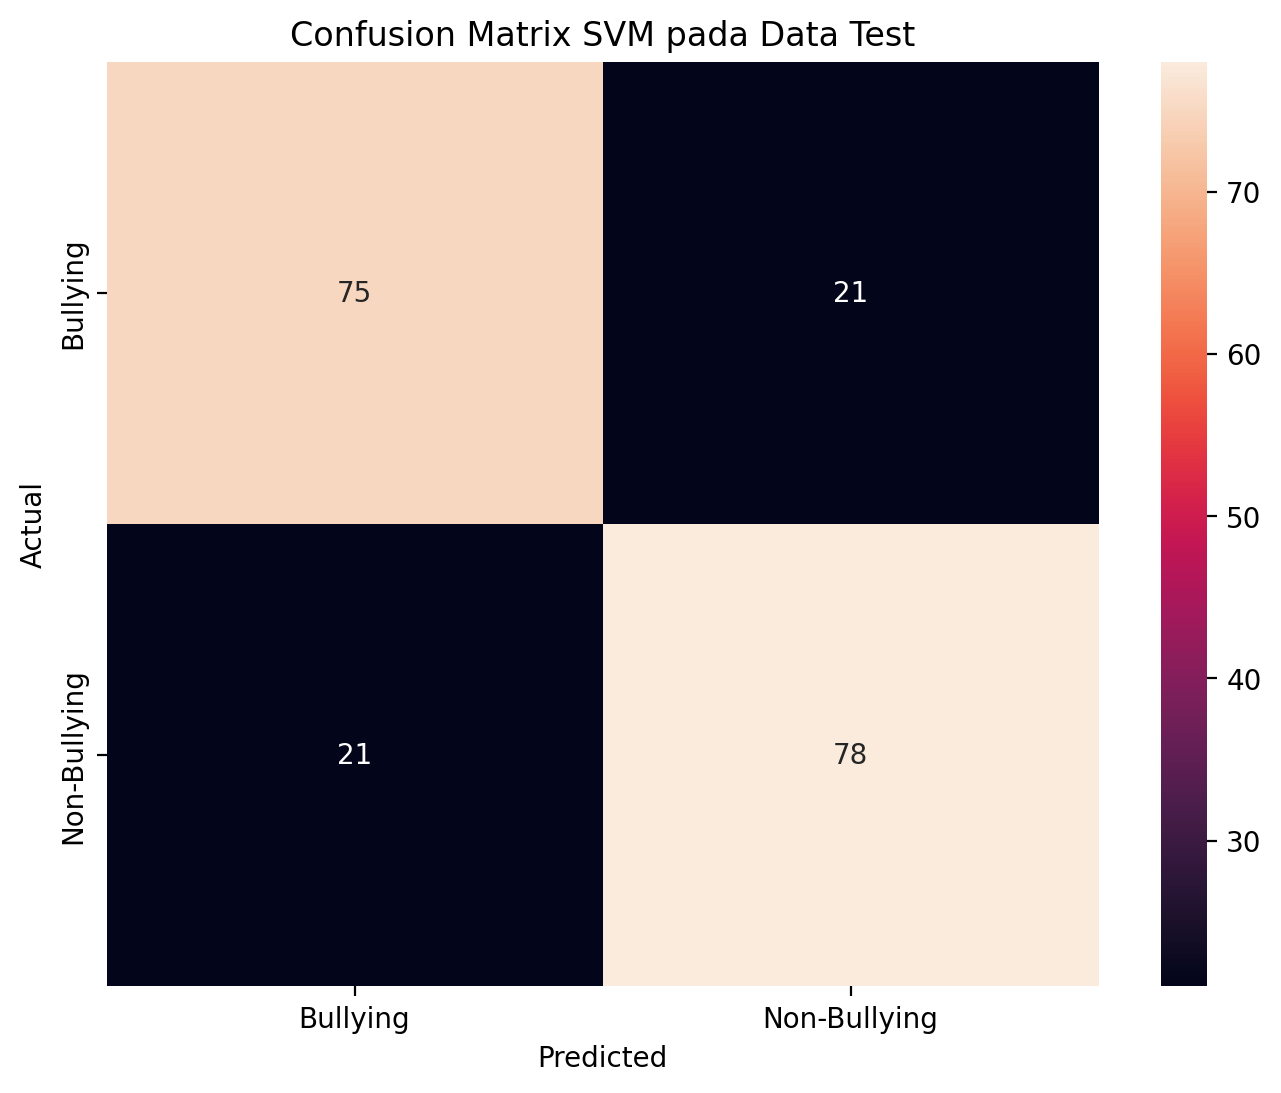

In [ ]:
# Confusion matrix SVM pada data train
conf_matSVM_t = confusion_matrix(Train_Y, predictions_SVM_t)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matSVM = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matSVM, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report Naive Bayes pada data training
print("klasifikasi report SVM pada data training")
print(" ")
print(classification_report(Train_Y, predictions_SVM_t))

print(" ")
print(" ")

#klasifikasi report Naive Bayes pada data testing
print("klasifikasi report SVM pada data testing")
print(" ")
print(classification_report(Test_Y, predictions_SVM))

klasifikasi report SVM pada data training
 
              precision    recall  f1-score   support

    Bullying       1.00      1.00      1.00       229
Non-bullying       1.00      1.00      1.00       226

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

 
 
klasifikasi report SVM pada data testing
 
              precision    recall  f1-score   support

    Bullying       0.78      0.78      0.78        96
Non-bullying       0.79      0.79      0.79        99

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



###Klasifikasi menggunakan Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(Train_X_Count,Train_Y)
score = LR.score(Test_X_Count, Test_Y)
score_t = LR.score(Train_X_Count, Train_Y)
print("Logistic Regression Accuracy Score Training-> ",score_t*100)
print("Logistic Regression Accuracy Score Testing-> ",score*100)

Logistic Regression Accuracy Score Training->  100.0
Logistic Regression Accuracy Score Testing->  76.92307692307693


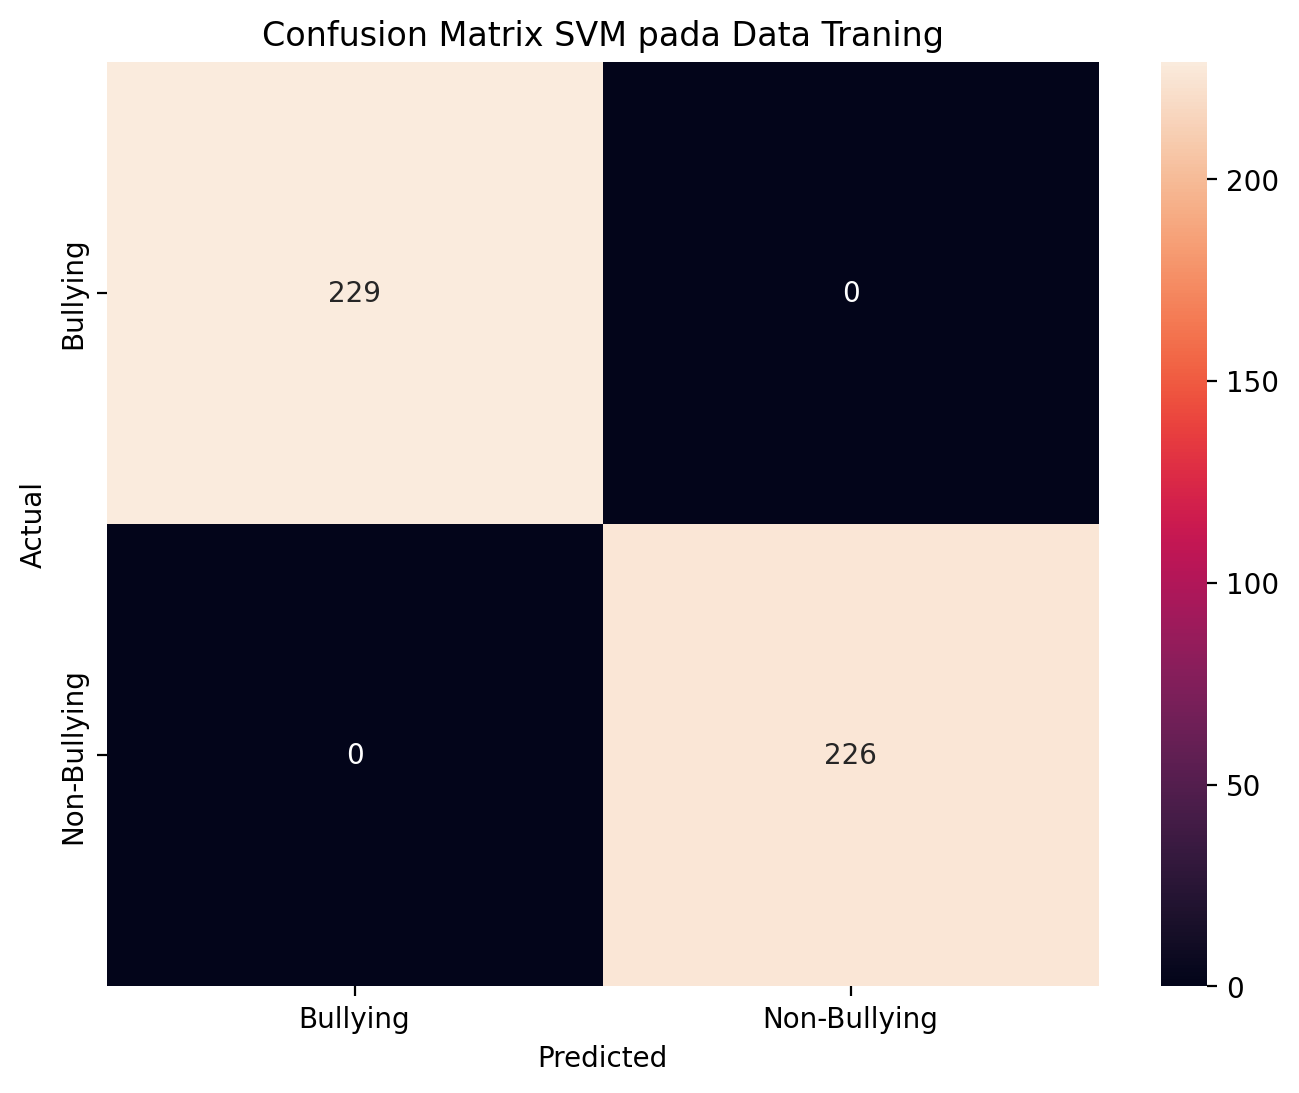

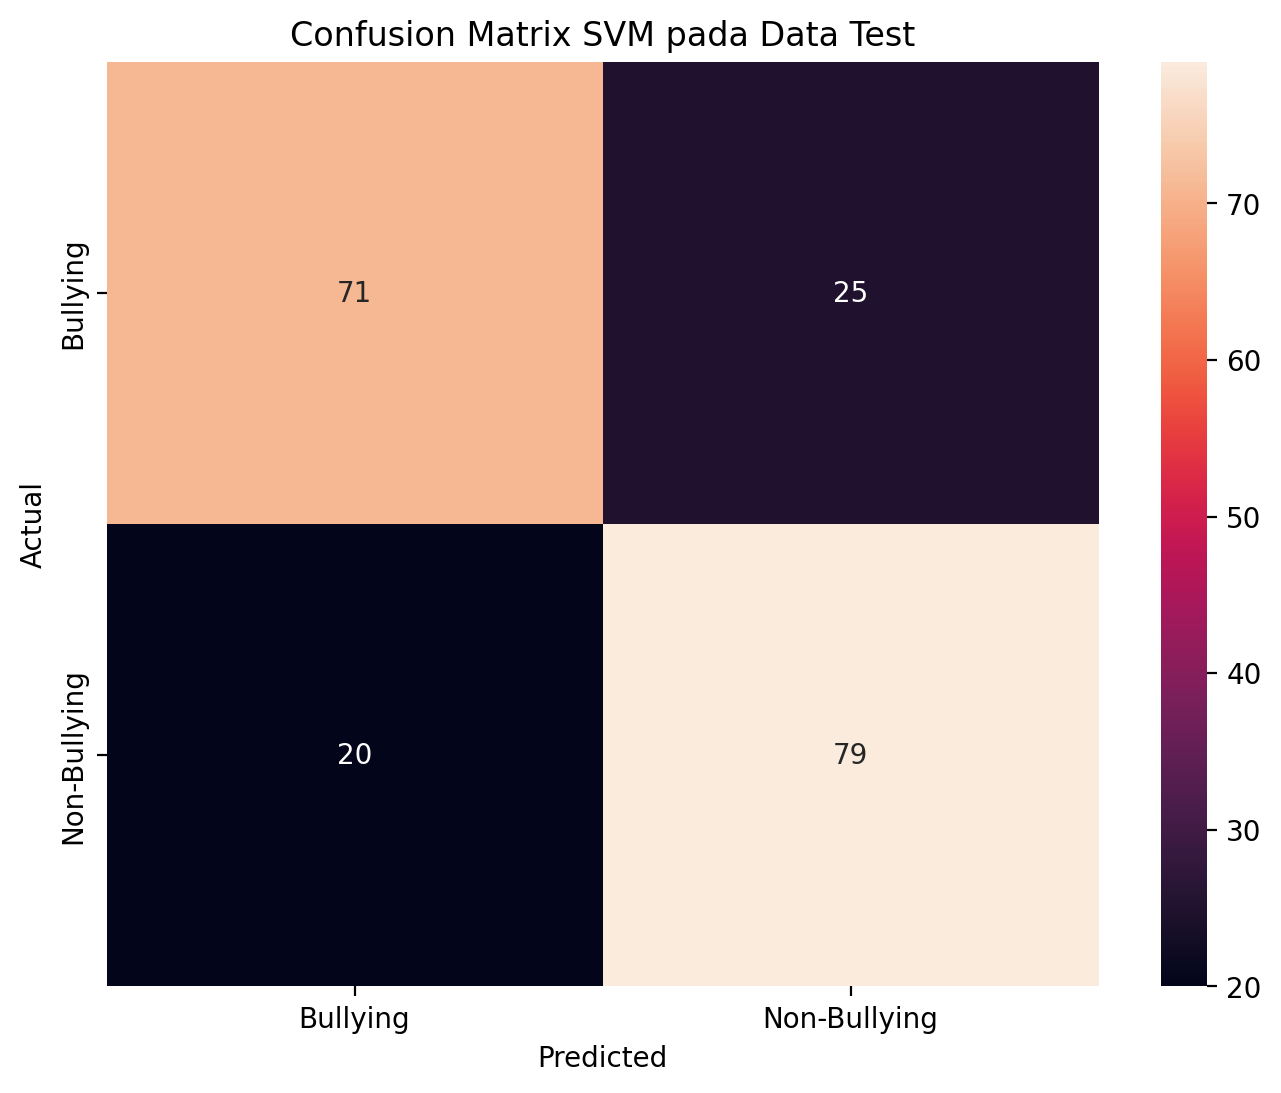

In [ ]:
# Confusion matrix SVM pada data train
conf_matLR_t= confusion_matrix(Train_Y, LR.predict(Train_X_Count))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matLR_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# confusion matrix Naive Bayes pada data Testing
conf_matLR = confusion_matrix(Test_Y, LR.predict(Test_X_Count))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matLR, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix SVM pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report Logistic Regression pada data training
print("klasifikasi report Logistic Regression pada data training")
print(" ")
print(classification_report(Train_Y, LR.predict(Train_X_Count)))

print(" ")
print(" ")

#klasifikasi report Logistic Regression pada data testing
print("klasifikasi report Logistic Regression pada data testing")
print(" ")
print(classification_report(Test_Y, LR.predict(Test_X_Count)))

klasifikasi report Logistic Regression pada data training
 
              precision    recall  f1-score   support

    Bullying       1.00      1.00      1.00       229
Non-bullying       1.00      1.00      1.00       226

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

 
 
klasifikasi report Logistic Regression pada data testing
 
              precision    recall  f1-score   support

    Bullying       0.78      0.74      0.76        96
Non-bullying       0.76      0.80      0.78        99

    accuracy                           0.77       195
   macro avg       0.77      0.77      0.77       195
weighted avg       0.77      0.77      0.77       195



###Klasifikasi menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
RF.fit(Train_X_Count,Train_Y)
score = RF.score(Test_X_Count, Test_Y)
score_t = RF.score(Train_X_Count, Train_Y)
print("Random Forest Classifier Accuracy Score Training-> ",score_t*100)
print("Random Forest Classifier Accuracy Score Testing-> ",score*100)

Random Forest Classifier Accuracy Score Training->  89.67032967032968
Random Forest Classifier Accuracy Score Testing->  81.02564102564102


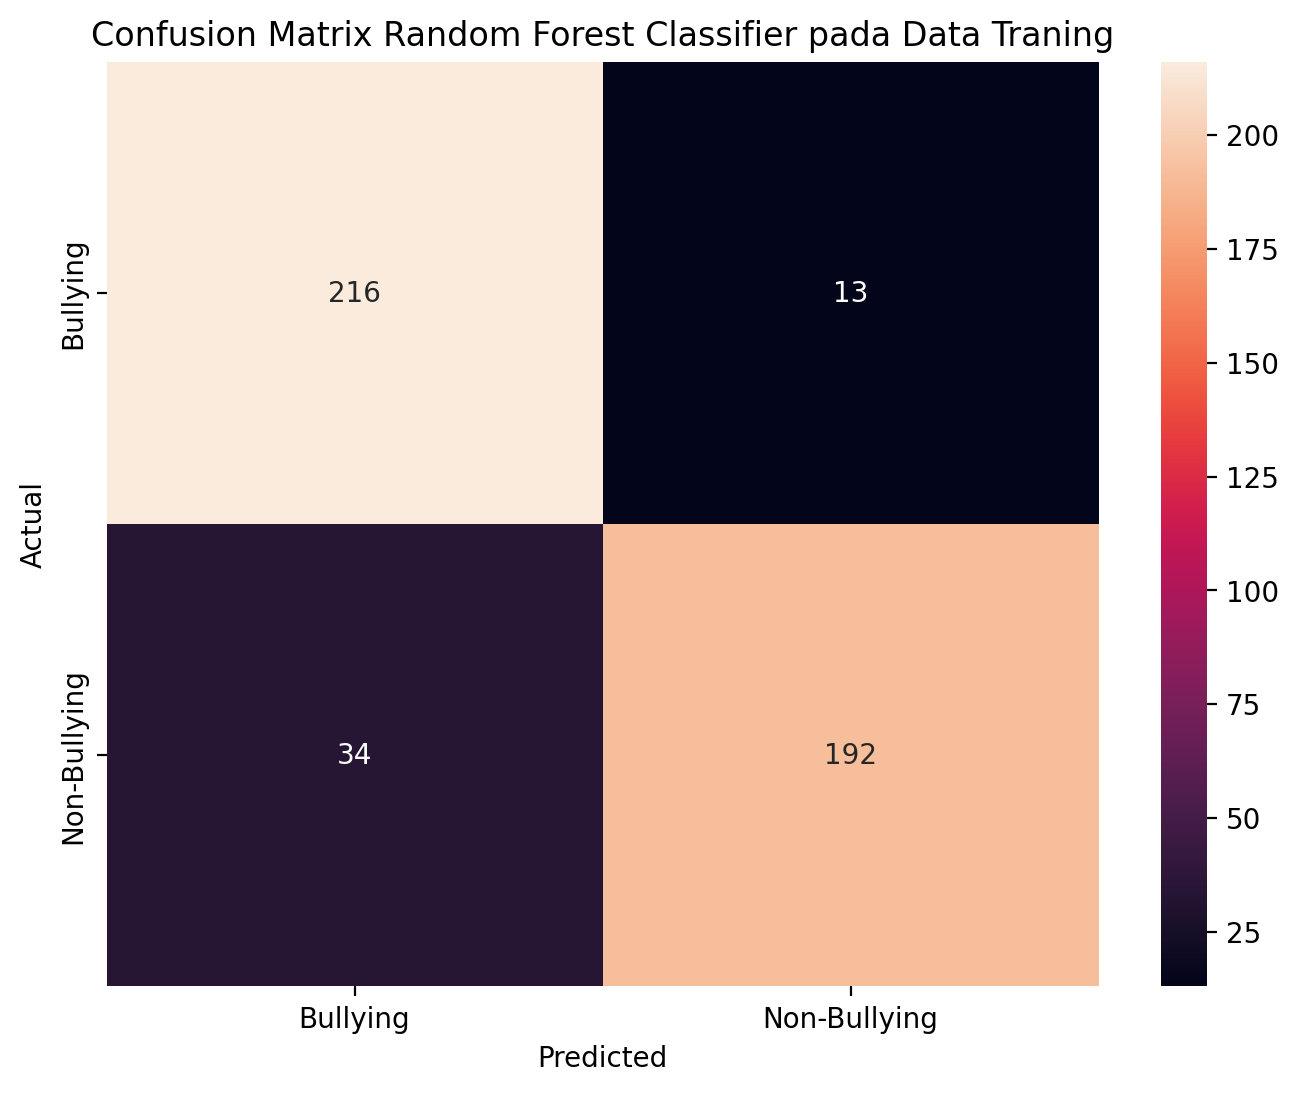

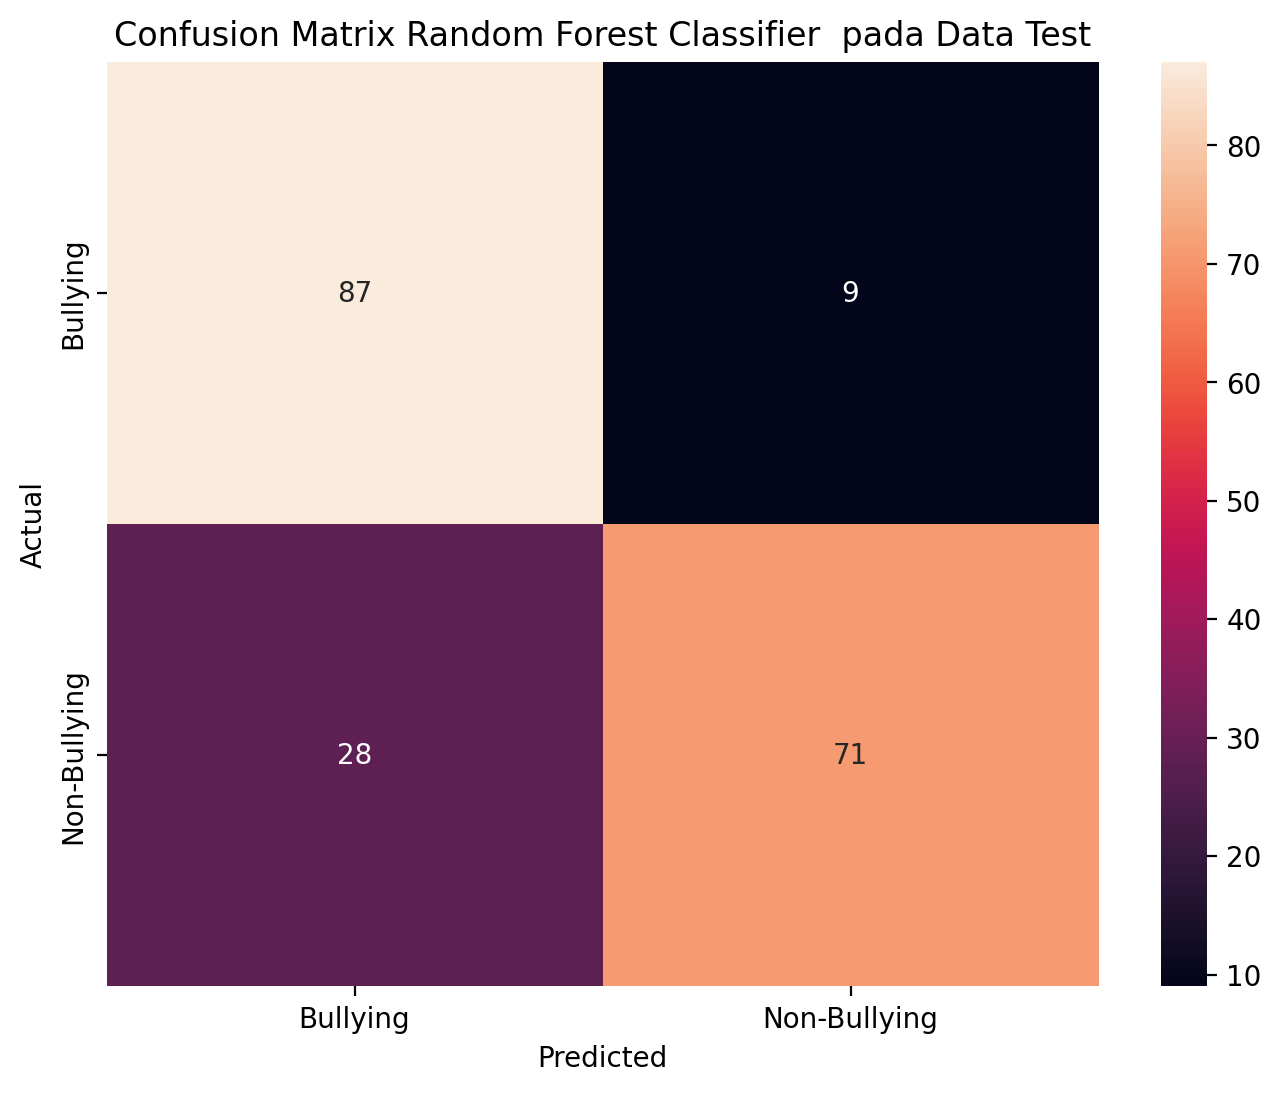

In [ ]:
# Confusion matrix Random Forest Classifier pada data train
conf_matRF_t = confusion_matrix(Train_Y, RF.predict(Train_X_Count))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matRF_t, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix Random Forest Classifier pada Data Traning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion matrix Random Forest Classifier  pada data test
conf_matRF = confusion_matrix(Test_Y, RF.predict(Test_X_Count))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matRF, annot=True, fmt='d',
            xticklabels=["Bullying", "Non-Bullying"], yticklabels=["Bullying", "Non-Bullying"])
plt.title('Confusion Matrix Random Forest Classifier  pada Data Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#klasifikasi report Random Forest Classifier pada data training
print("klasifikasi report Random Forest Classifier pada data training")
print(" ")
print(classification_report(Train_Y, RF.predict(Train_X_Count)))

#klasifikasi report Random Forest Classifier pada data testing
print(" ")
print(" ")
print("klasifikasiRandom Forest Classifier pada data testing")
print(" ")
print(classification_report(Test_Y, RF.predict(Test_X_Count)))

klasifikasi report Random Forest Classifier pada data training
 
              precision    recall  f1-score   support

    Bullying       0.86      0.94      0.90       229
Non-bullying       0.94      0.85      0.89       226

    accuracy                           0.90       455
   macro avg       0.90      0.90      0.90       455
weighted avg       0.90      0.90      0.90       455

 
 
klasifikasiRandom Forest Classifier pada data testing
 
              precision    recall  f1-score   support

    Bullying       0.76      0.91      0.82        96
Non-bullying       0.89      0.72      0.79        99

    accuracy                           0.81       195
   macro avg       0.82      0.81      0.81       195
weighted avg       0.82      0.81      0.81       195

